In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import utils

%load_ext autoreload
%autoreload 2

## Simulation

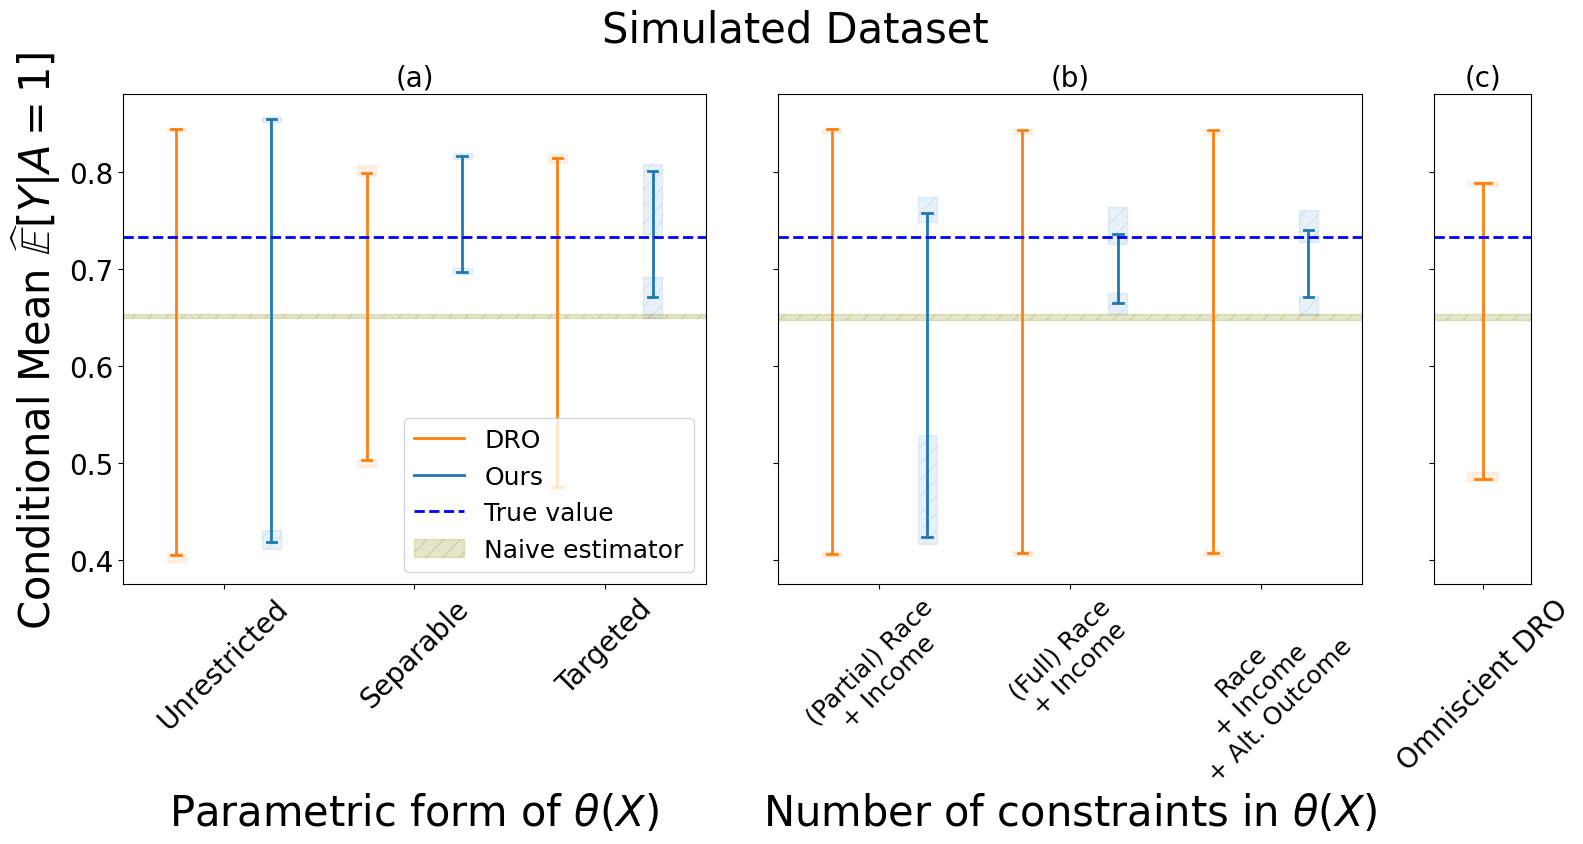

In [52]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 8), sharey=True, width_ratios=[6, 6, 1])


utils.generate_theta_plots_1_2_3(
    base_path="../experiment_artifacts/",
    timestamp_ours="Oct11-1622",
    timestamp_dro="Oct11-1623",
    ax=ax[0],
)

utils.generate_theta_plots_4_5_6(
    base_path="../experiment_artifacts/",
    timestamp_ours="Oct11-1557",
    timestamp_dro="Oct11-1558",
    ax=ax[1],
)

utils.generate_plot_dro(
    base_path="../experiment_artifacts/",
    timestamp="synthetic_123",
    ax=ax[2],
)

# Add a legend
handles, labels = ax[0].get_legend_handles_labels()
relevant_handles = handles[0:1] + handles[-3:]
relevant_labels = labels[0:1] + labels[-3:]
ax[0].legend(
    loc="lower right", fontsize=18, handles=relevant_handles, labels=relevant_labels
)

ax[0].set_title("(a)", fontsize=20)
ax[1].set_title("(b)", fontsize=20)
ax[2].set_title("(c)", fontsize=20)

fig.align_xlabels()
fig.tight_layout()
fig.suptitle("Simulated Dataset", fontsize=30, y=1.05)
fig.savefig("../synthetic_conditional_mean.png", bbox_inches="tight", dpi=300)

## Folktables

/Users/carlospatino/Factored/inference_contrained_distribution_shift/plotting/utils.py:47: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  max_steps = plotting_df.groupby(["matrix_type", "restriction_type"]).max()


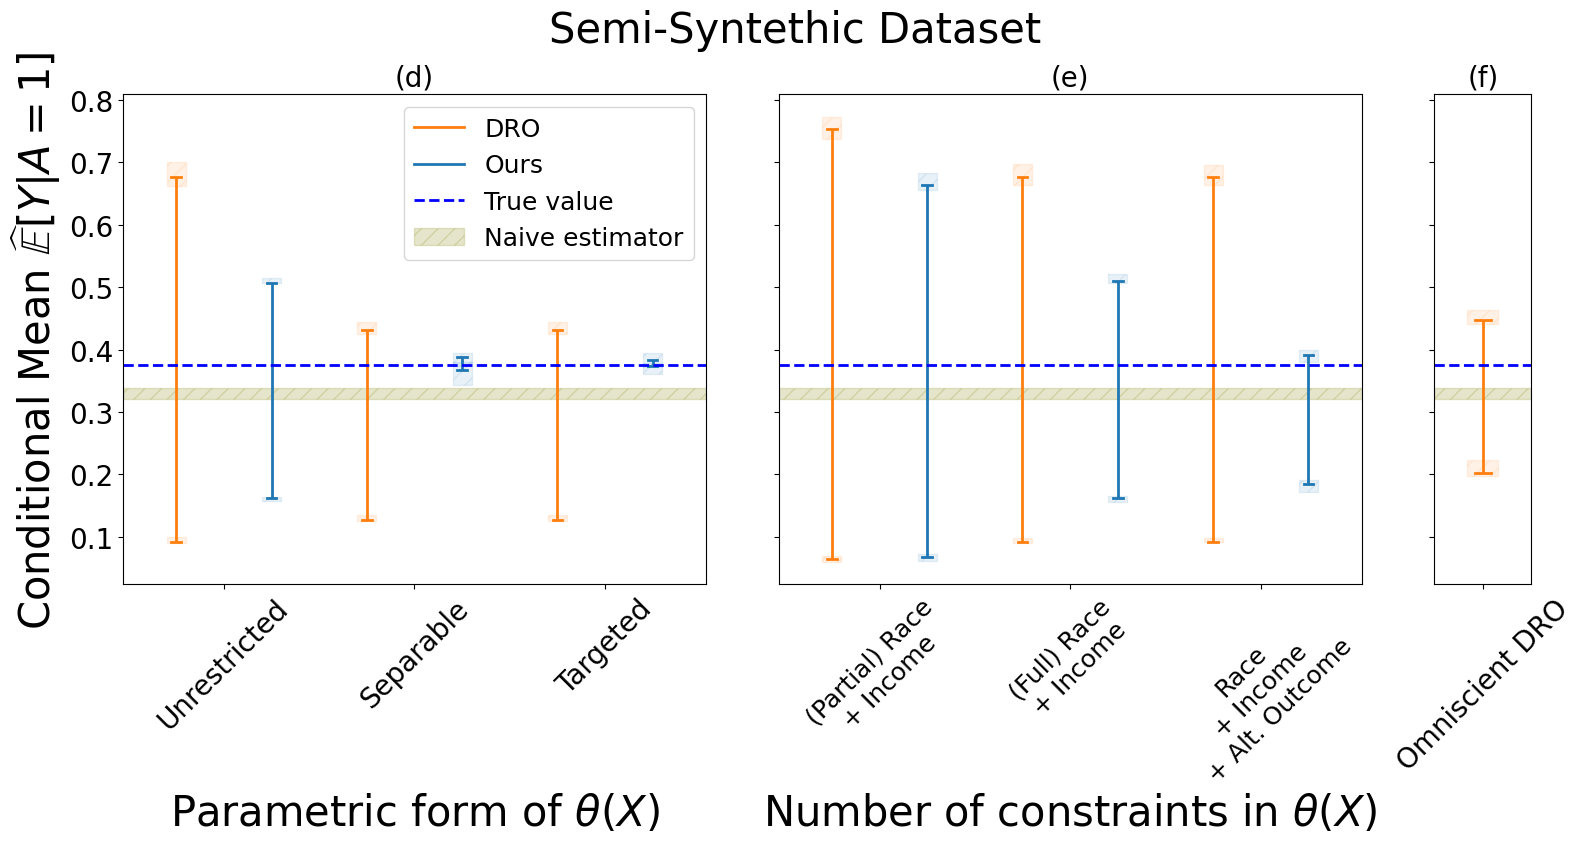

In [54]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 8), sharey=True, width_ratios=[6, 6, 1])


utils.generate_theta_plots_1_2_3(
    base_path="../experiment_artifacts/",
    timestamp_ours="semisynthetic_123",
    timestamp_dro="semisynthetic_123_DRO",
    ax=ax[0],
)

utils.generate_theta_plots_4_5_6(
    base_path="../experiment_artifacts/",
    timestamp_ours="semisynthetic_456",
    timestamp_dro="semisynthetic_456_DRO",
    ax=ax[1],
)
utils.generate_plot_dro(
    base_path="../experiment_artifacts/",
    timestamp="semisynthetic_123",
    ax=ax[2],
)

# Add a legend
handles, labels = ax[0].get_legend_handles_labels()
relevant_handles = handles[0:1] + handles[-3:]
relevant_labels = labels[0:1] + labels[-3:]
ax[0].legend(
    loc="upper right", fontsize=18, handles=relevant_handles, labels=relevant_labels
)

ax[0].set_title("(d)", fontsize=20)
ax[1].set_title("(e)", fontsize=20)
ax[2].set_title("(f)", fontsize=20)

fig.align_xlabels()
fig.tight_layout()
fig.suptitle("Semi-Syntethic Dataset", fontsize=30, y=1.05)
fig.savefig("../semisynthetic_conditional_mean.png", bbox_inches="tight", dpi=300)

## Regression

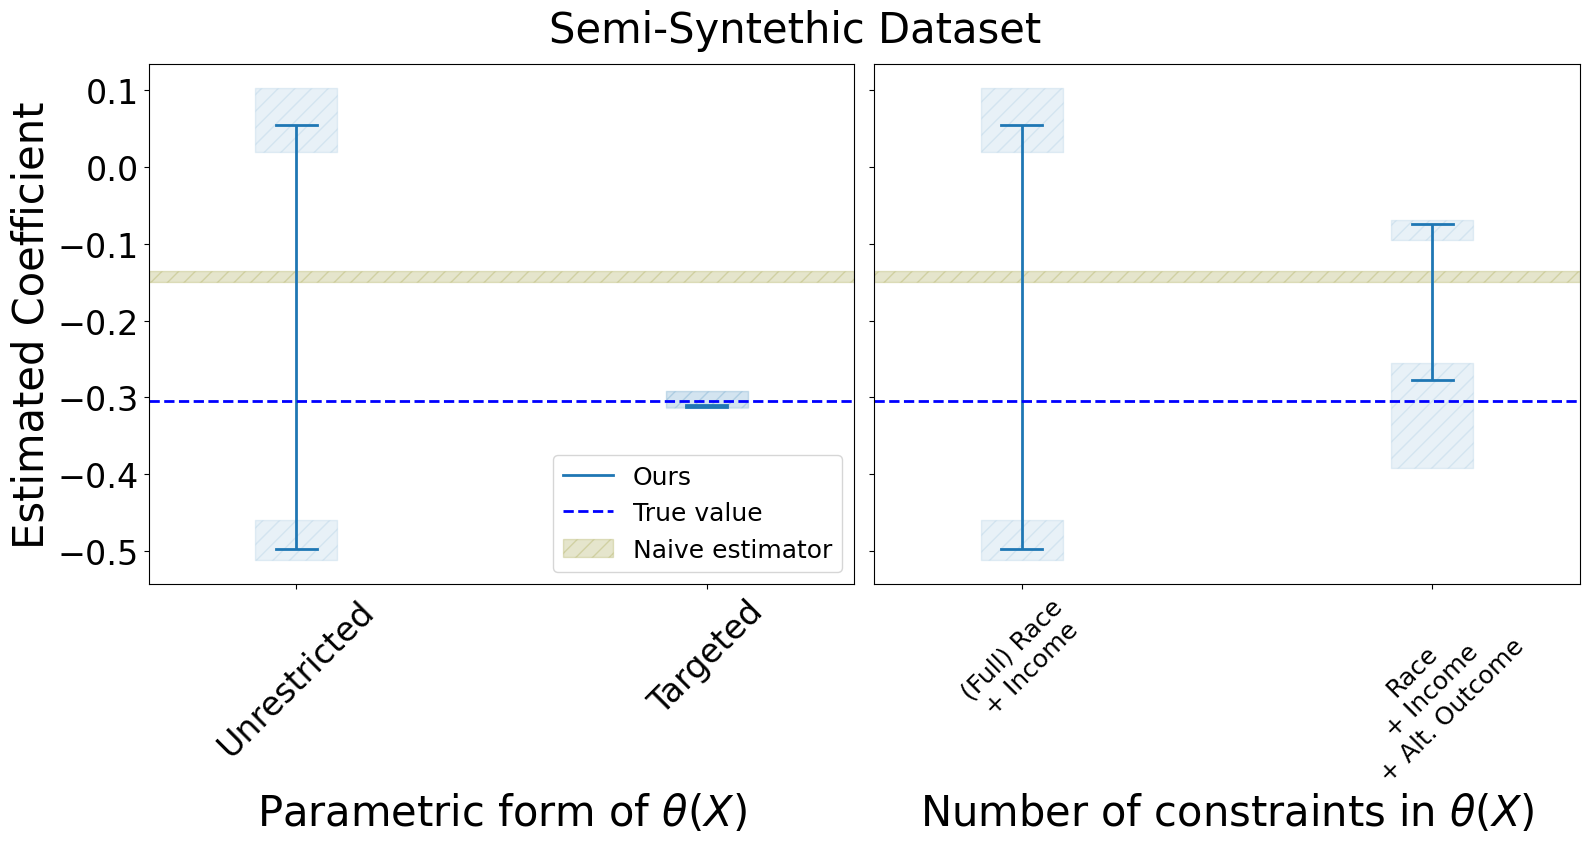

In [56]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 8), sharey=True, width_ratios=[1, 1])

utils.generate_theta_plots_1_2_regression(
    base_path="../experiment_artifacts/", timestamp="regression_1_2", ax=ax[0]
)

utils.generate_theta_plots_3_4_regression(
    base_path="../experiment_artifacts/", timestamp="regression_3_4", ax=ax[1]
)

handles, labels = ax[0].get_legend_handles_labels()
relevant_handles = handles[0:1] + handles[-2:]
relevant_labels = labels[0:1] + labels[-2:]
ax[0].legend(
    loc="lower right", fontsize=18, handles=relevant_handles, labels=relevant_labels
)

fig.align_xlabels()
fig.tight_layout()
fig.suptitle("Semi-Syntethic Dataset", fontsize=30, y=1.05)

fig.savefig("../regression_coeff.png", dpi=300, bbox_inches="tight")

## Covariance

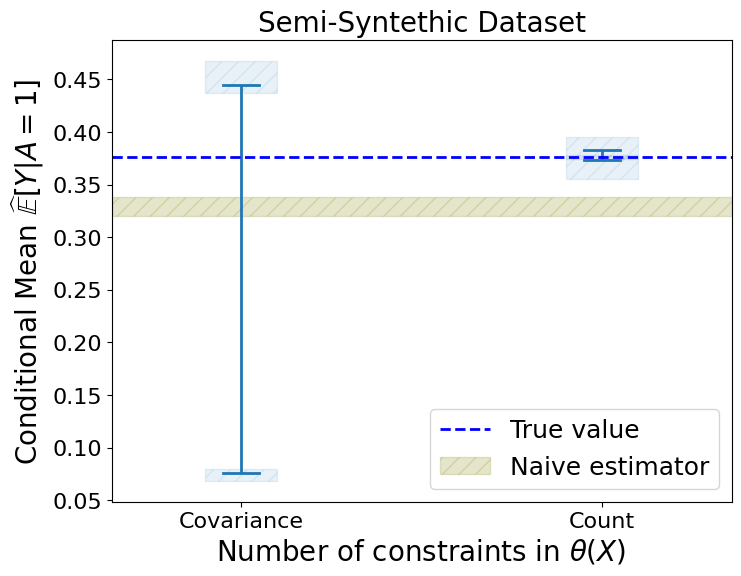

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))

utils.generate_cov_plots(
    base_path="../experiment_artifacts/", timestamp="cov_results", ax=ax
)

ax.set_title("Semi-Syntethic Dataset", fontsize=20)
fig.savefig("../semisynthetic_cov_restriction.png")